In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import io

## Data

In [39]:
# Data is based on LSST schema 7.4
pdf = pd.read_parquet("sample_200_alerts_or5p2.parquet")

In [38]:
pdf.columns

Index(['alertId', 'diaSource', 'prvDiaSources', 'prvDiaForcedSources',
       'prvDiaNondetectionLimits', 'diaObject', 'ssObject', 'cutoutDifference',
       'cutoutScience', 'cutoutTemplate', 'brokerIngestMjd',
       'brokerEndProcessMjd', 'brokerStartProcessTimestamp',
       'fink_broker_version', 'fink_science_version', 'publisher', 'cdsxmatch',
       'tns', 'DR3Name', 'Plx', 'e_Plx', 'vsx', 'spicy_id', 'spicy_class',
       'gcvs', 'x3hsp', 'x4lac', 'mangrove', 'roid', 'snn_sn_vs_others',
       'cats_broad_class', 'brokerEndProcessTimestamp'],
      dtype='object')

## Cutouts

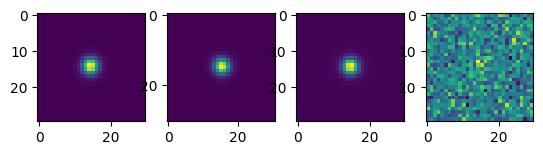

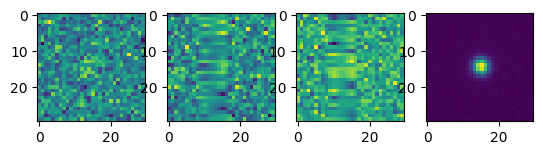

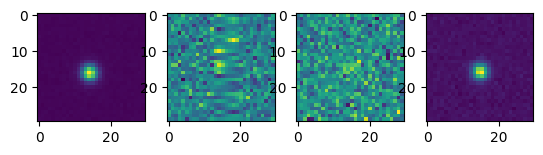

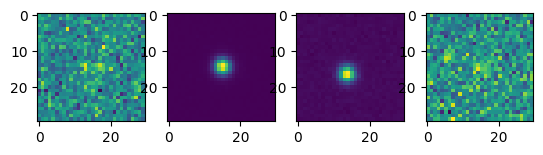

In [66]:
ncutouts = 16
ncutouts_per_shot = 4
flavour = "cutoutScience"

cutouts = pdf[flavour].sample(n=ncutouts)

for row in range(int(ncutouts / ncutouts_per_shot)):
    fig, axes = plt.subplots(1, 4)
    for index, cutout in enumerate(cutouts[ncutouts_per_shot*row: ncutouts_per_shot*(row + 1)]):
        with fits.open(io.BytesIO(cutout)) as hdu:
            data = hdu[0].data
        axes[index].imshow(data)

## Lightcurves

In [54]:
sub = pdf[pdf["prvDiaSources"].apply(lambda x: x is not None)]

[61058.062391224536, 61058.062391224536, 61058.062391224536, 61314.27337522106] [167.11300659179688, 167.0695037841797, 167.0467071533203, 477.0897216796875]


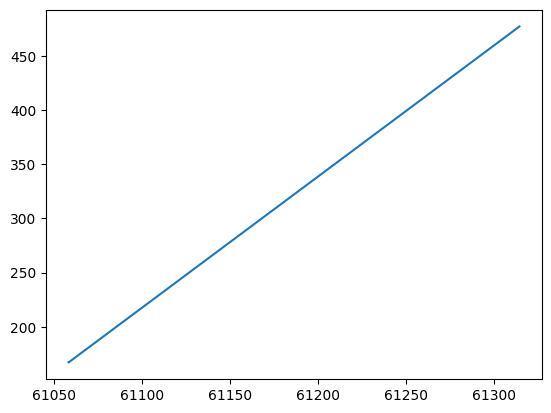

[61058.062391224536, 61314.27337522106] [5685.44482421875, -304758.78125]


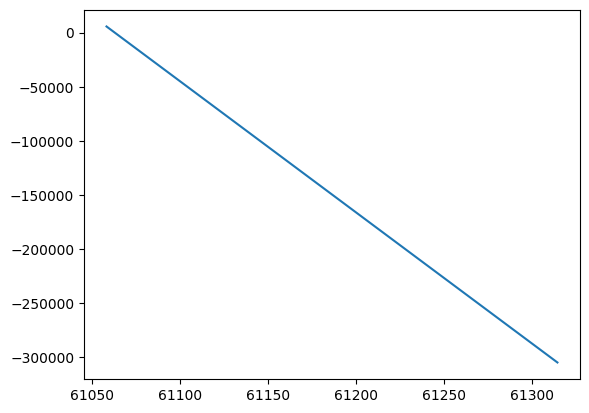

[61058.062391224536, 61058.062391224536, 61314.27337522106] [-215.64749145507812, -215.64749145507812, 111.83769226074219]


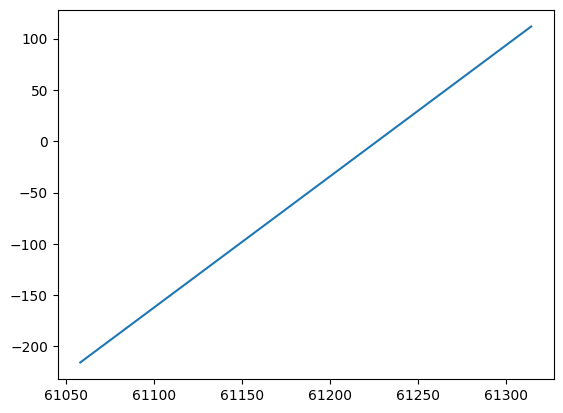

[61314.27337522106] [-3661.539794921875]


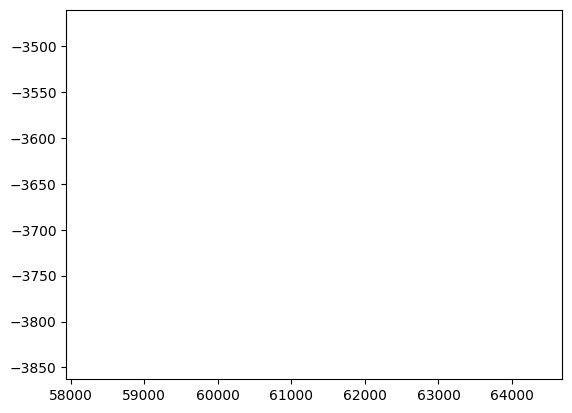

[61314.27337522106] [-361566.46875]


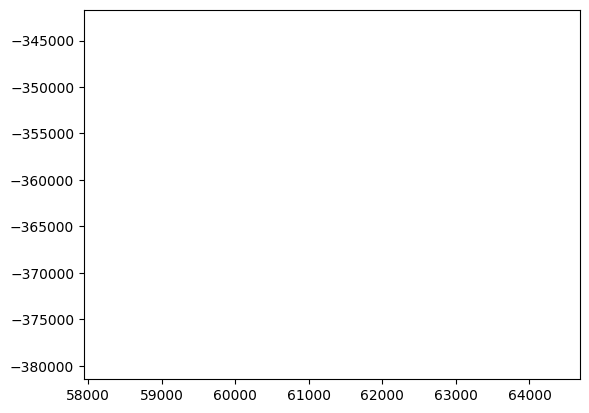

[61314.27337522106] [-4793.42041015625]


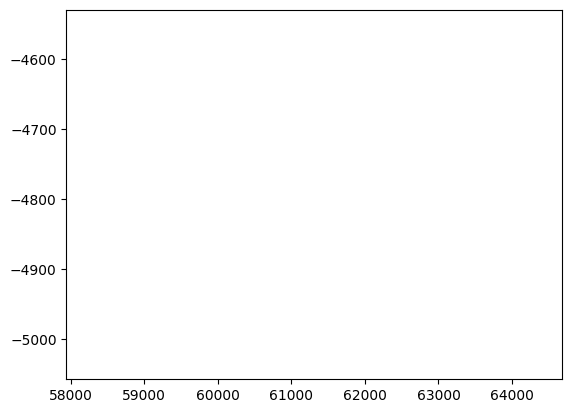

[61314.27337522106] [1115.11328125]


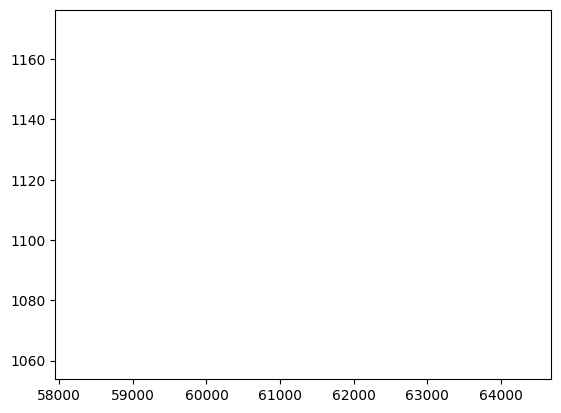

[61314.27337522106] [-7220.166015625]


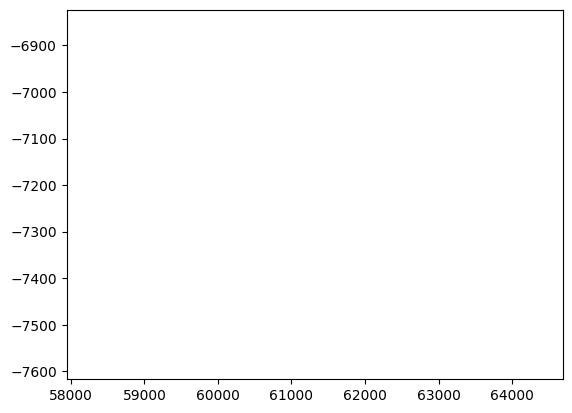

[61314.27337522106] [1105.15673828125]


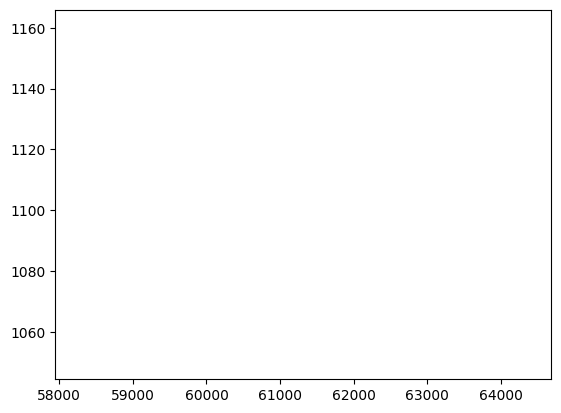

[61314.27337522106] [-808.3609008789062]


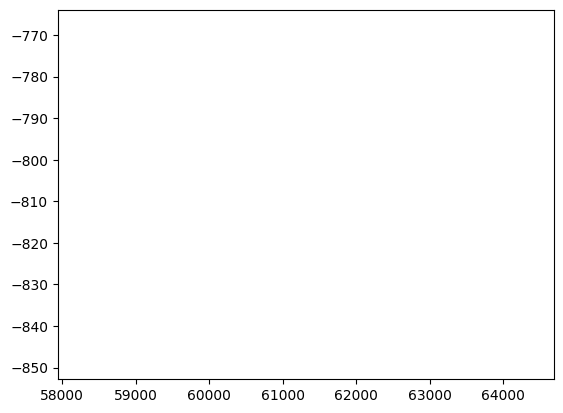

[61314.27337522106] [-33077.9140625]


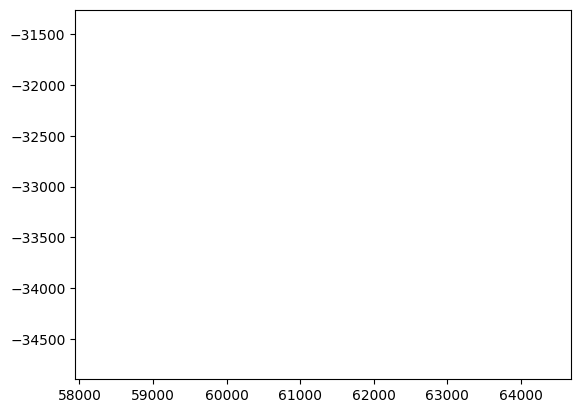

[61314.27337522106] [3589.725341796875]


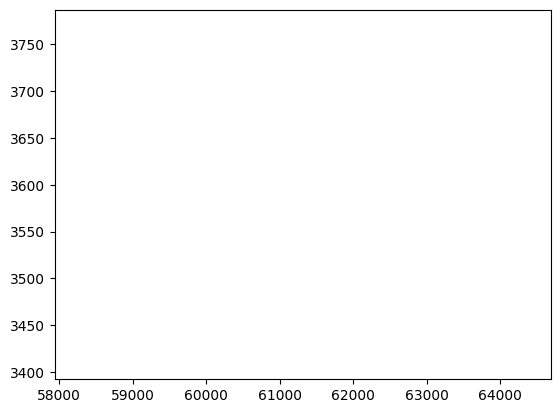

[61314.27337522106] [1494.7257080078125]


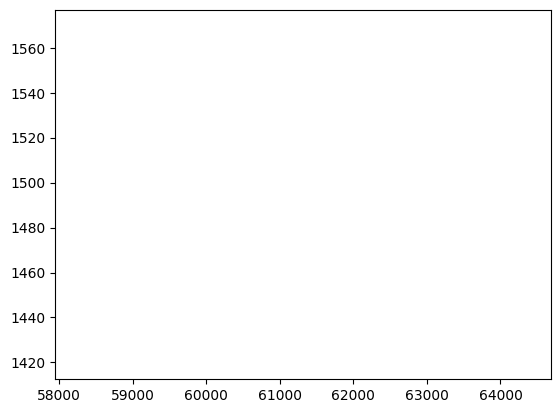

[61314.27337522106] [4644.8359375]


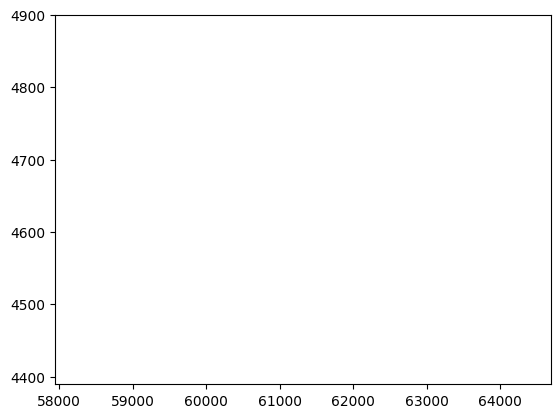

[61058.062391224536, 61314.27337522106] [-1956.2757568359375, 4683.00537109375]


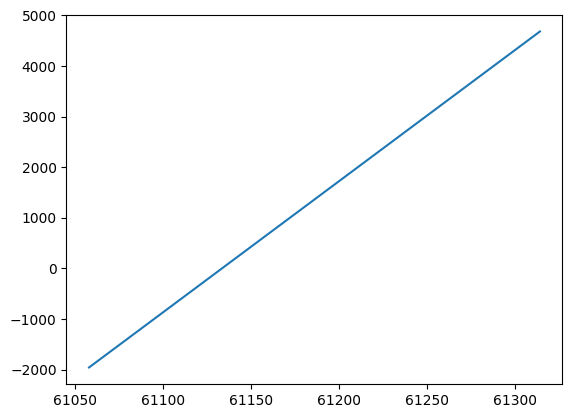

[61058.062391224536, 61314.27337522106] [3321.74560546875, 3121.396728515625]


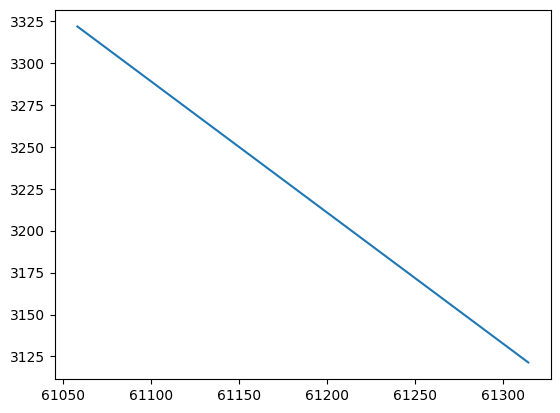

[61058.062391224536, 61314.27337522106] [6530.693359375, -43164.79296875]


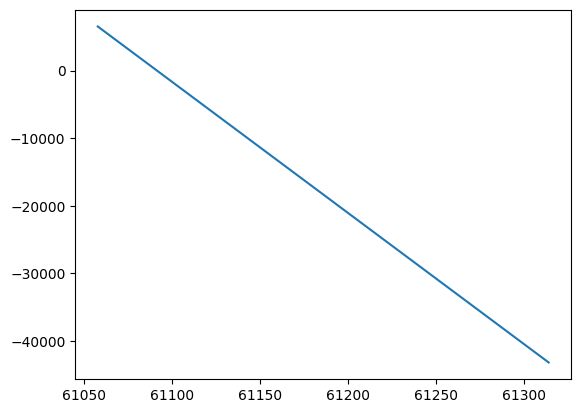

[61058.062391224536, 61314.27337522106] [-3280.564697265625, 1952.0615234375]


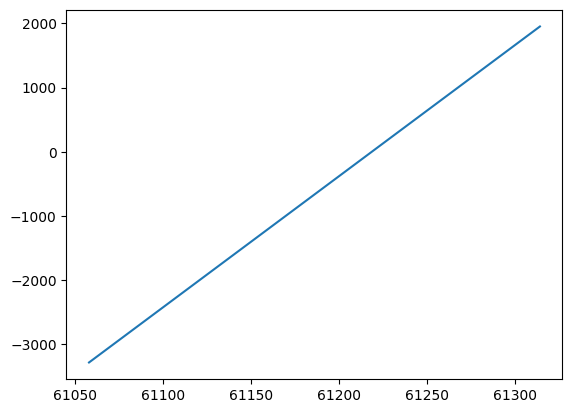

[61058.062391224536, 61314.27337522106] [2548.883056640625, 3331.470458984375]


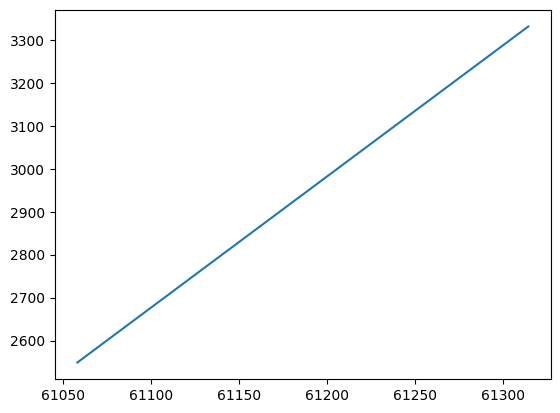

[61058.062391224536, 61314.27337522106] [-1820.5718994140625, 811.8550415039062]


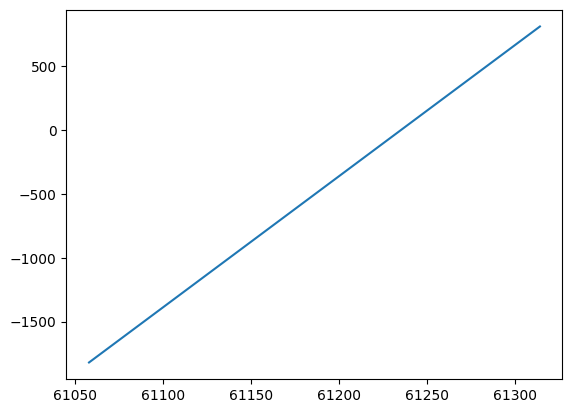

[61058.062391224536, 61058.062391224536, 61058.062391224536, 61314.27337522106] [-203.74855041503906, -203.70343017578125, -203.74166870117188, -527.3440551757812]


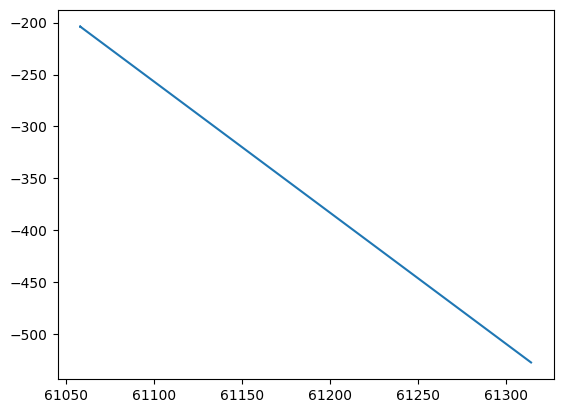

[61058.062391224536, 61058.062391224536, 61058.062391224536, 61314.27337522106] [-485.4675598144531, -485.50299072265625, -485.4760437011719, 1115.4306640625]


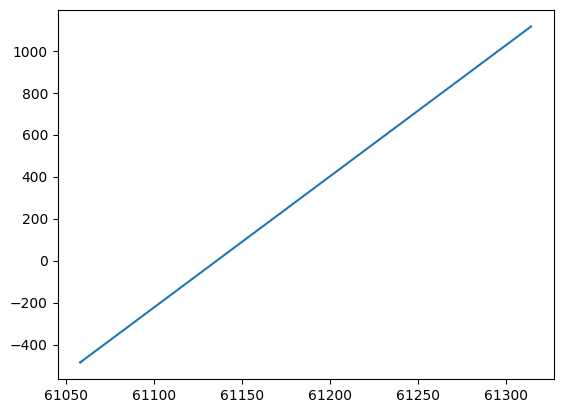

[61314.27337522106] [1081.201416015625]


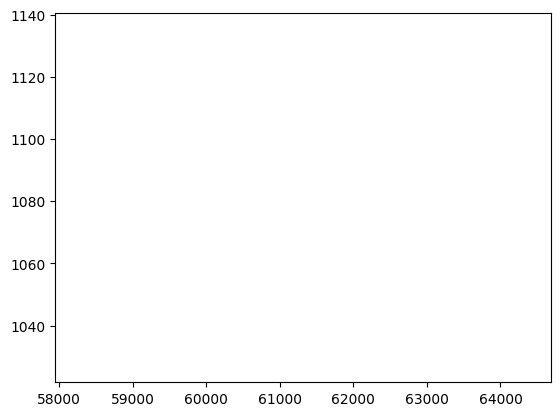

[61314.27337522106] [19.269859313964844]


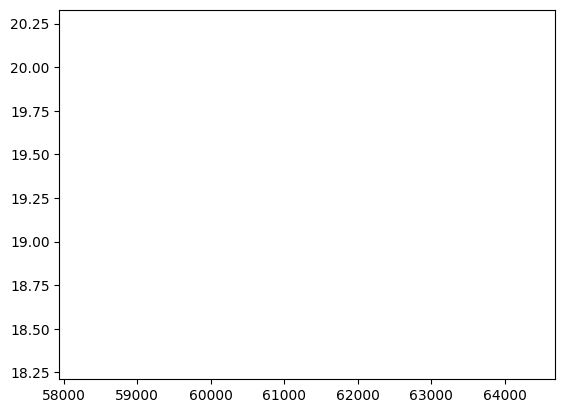

[61058.062391224536, 61058.062391224536, 61314.27337522106] [-1499.5589599609375, -1499.5589599609375, 1226.92333984375]


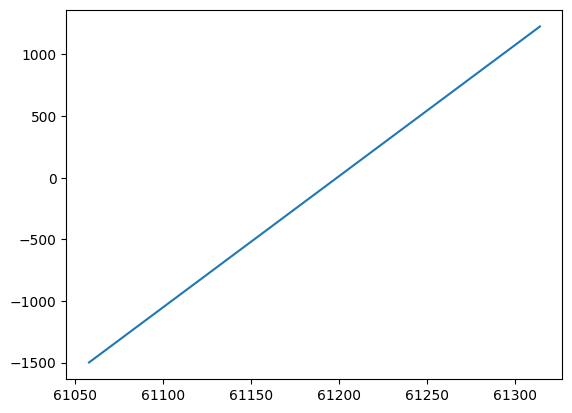

[61314.27337522106] [995.2153930664062]


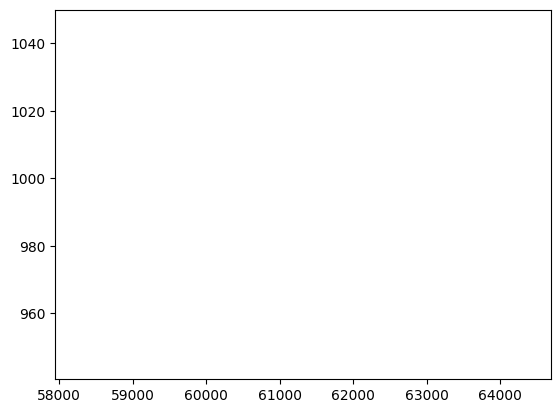

[61058.062391224536, 61314.27337522106] [-1202.409912109375, -1565.505859375]


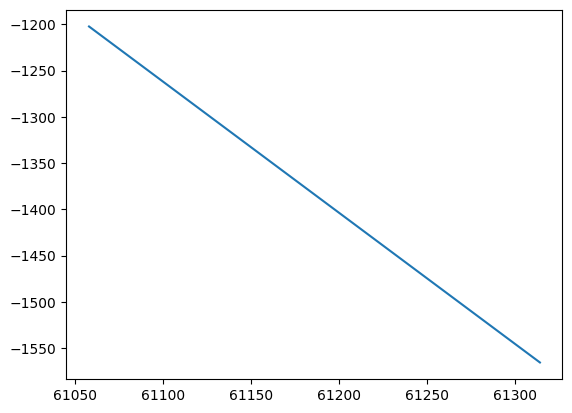

[61058.062391224536, 61314.27337522106] [2412.6240234375, -354927.0625]


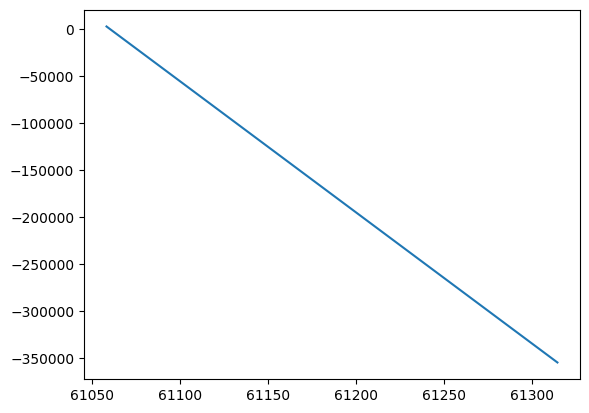

[61314.27337522106] [-968.2382202148438]


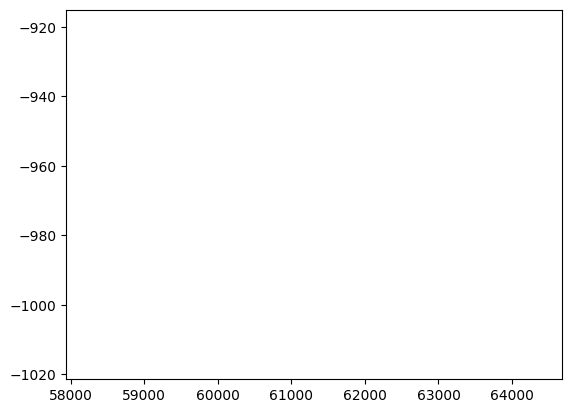

[61314.27337522106] [-845.680419921875]


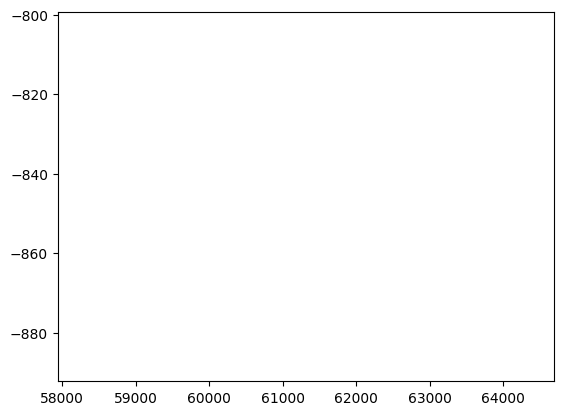

[61314.27337522106] [-1087.4412841796875]


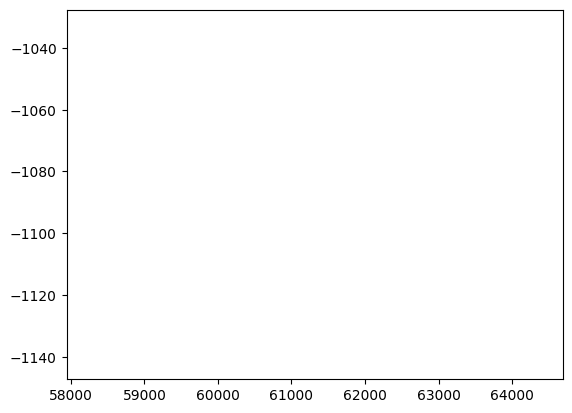

[61314.27337522106] [-1405.371337890625]


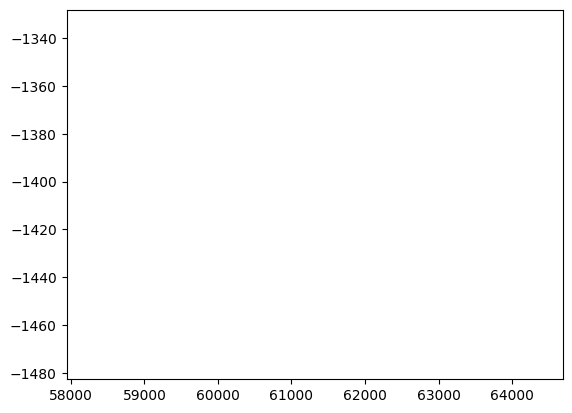

[61314.27337522106] [-993.8394775390625]


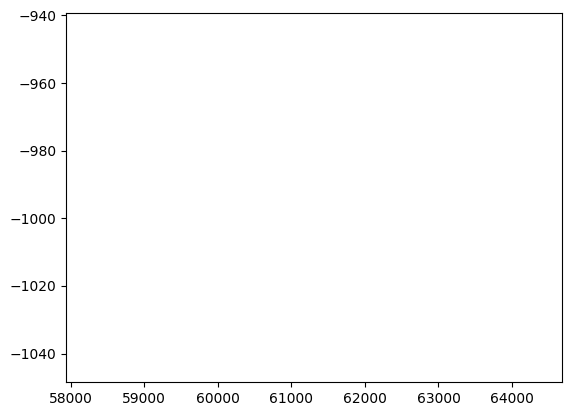

[61314.27337522106] [-1557.2662353515625]


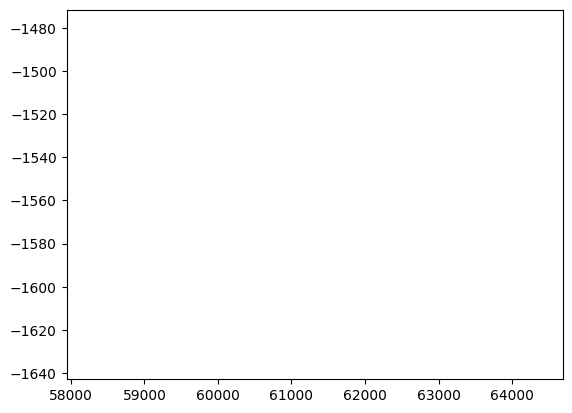

[61314.27337522106] [-1709.5472412109375]


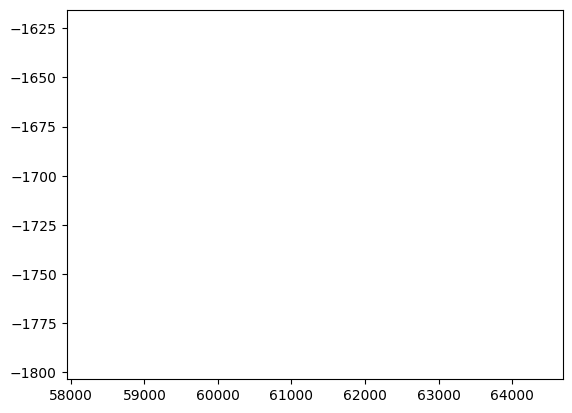

[61058.062391224536, 61314.27337522106] [-4635.8271484375, 4244.595703125]


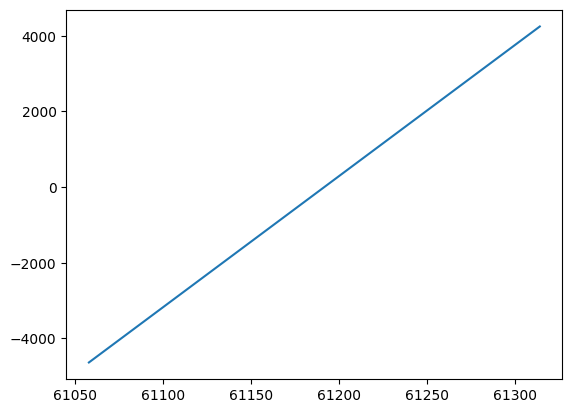

[61314.27337522106, 61314.27337522106] [2753.18017578125, 2753.341064453125]


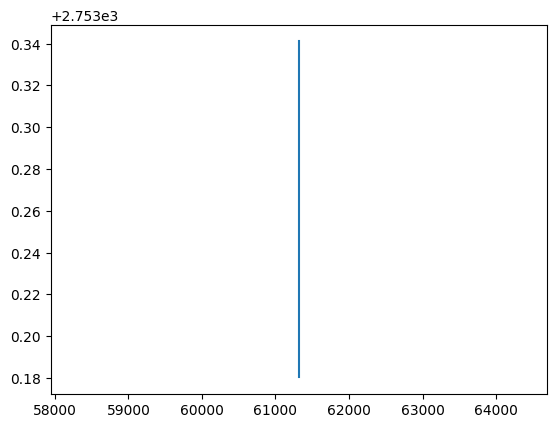

In [65]:
# hopeless!
for index, row in sub.iterrows():
    # print(row["prvDiaSources"][0].keys())
    time = [i["midpointMjdTai"] for i in row["prvDiaSources"]]
    flux = [i["psfFlux"] for i in row["prvDiaSources"]]
    print(time, flux) # LOL!
    plt.plot(time, flux)
    plt.show()